# Sentiment Analysis using RNN by `Mr. Harshit Dawar!`

In [2]:
# Importing the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_excel("amazonLabelled.xlsx")

In [5]:
data.drop("S", axis = 1, inplace = True)

In [6]:
data.head()

,Feedback,Sentiment
0,"Good case, Excellent value.",Positive
1,Great for the jawbone.,Positive
2,Tied to charger for conversations lasting more...,Negative
3,The mic is great.,Positive
4,I have to jiggle the plug to get it to line up...,Negative


## PreProcessing of the Data

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
Encoder = LabelEncoder()

In [9]:
Sentiments = Encoder.fit_transform(data.Sentiment.values)

In [10]:
Sentiments

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,

In [11]:
Sentiments.shape

(999,)

In [25]:
np.unique(Sentiments, return_counts = True)

(array([0, 1]), array([499, 500]))

In [15]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

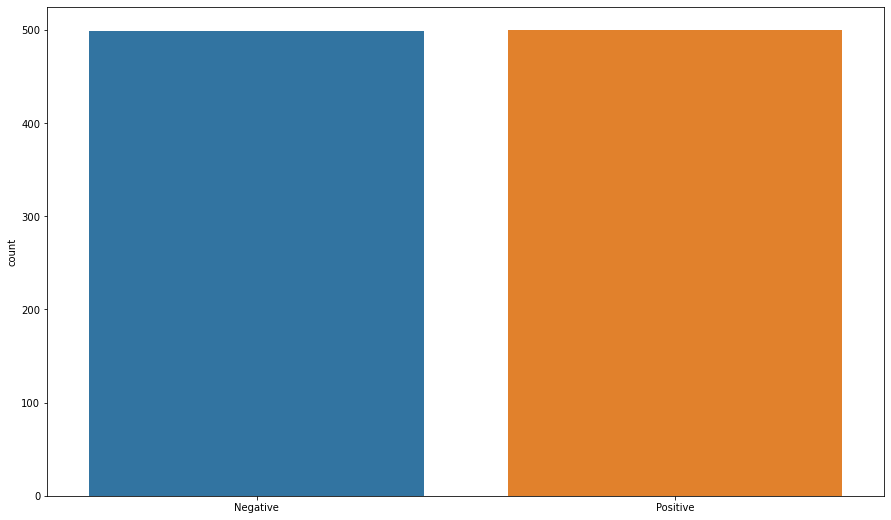

In [24]:
plt.figure(figsize = (15, 9))
sns.countplot(Sentiments)
plt.xticks(range(2), labels = ["Negative", "Positive"])
plt.show()

In [27]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [28]:
tokenizer = Tokenizer()

In [32]:
tokenizer.fit_on_texts(data.Feedback)

In [34]:
tokenizer.word_counts

OrderedDict([('good', 77),
             ('case', 29),
             ('excellent', 27),
             ('value', 5),
             ('great', 99),
             ('for', 120),
             ('the', 518),
             ('jawbone', 3),
             ('tied', 1),
             ('to', 196),
             ('charger', 19),
             ('conversations', 3),
             ('lasting', 2),
             ('more', 19),
             ('than', 28),
             ('45', 1),
             ('minutes', 6),
             ('major', 1),
             ('problems', 12),
             ('mic', 4),
             ('is', 242),
             ('i', 321),
             ('have', 73),
             ('jiggle', 1),
             ('plug', 10),
             ('get', 22),
             ('it', 283),
             ('line', 5),
             ('up', 27),
             ('right', 12),
             ('decent', 4),
             ('volume', 12),
             ('if', 29),
             ('you', 69),
             ('several', 7),
             ('dozen', 1),
            

In [35]:
len(tokenizer.word_counts)

1876

In [36]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'it': 4,
 'is': 5,
 'a': 6,
 'this': 7,
 'to': 8,
 'phone': 9,
 'my': 10,
 'for': 11,
 'of': 12,
 'not': 13,
 'with': 14,
 'very': 15,
 'great': 16,
 'was': 17,
 'on': 18,
 'in': 19,
 'that': 20,
 'good': 21,
 'have': 22,
 'you': 23,
 'product': 24,
 'quality': 25,
 'had': 26,
 'headset': 27,
 'works': 28,
 'battery': 29,
 'but': 30,
 'as': 31,
 'sound': 32,
 'are': 33,
 'well': 34,
 'one': 35,
 'all': 36,
 'so': 37,
 'use': 38,
 'ear': 39,
 'has': 40,
 'would': 41,
 'work': 42,
 'from': 43,
 'your': 44,
 'like': 45,
 'be': 46,
 'case': 47,
 'if': 48,
 'than': 49,
 "i've": 50,
 'me': 51,
 "don't": 52,
 'excellent': 53,
 'up': 54,
 'time': 55,
 "it's": 56,
 'after': 57,
 'price': 58,
 'recommend': 59,
 'does': 60,
 'no': 61,
 'really': 62,
 '2': 63,
 'at': 64,
 'or': 65,
 'best': 66,
 'out': 67,
 'only': 68,
 'service': 69,
 'get': 70,
 'when': 71,
 'nice': 72,
 "i'm": 73,
 'also': 74,
 'too': 75,
 'just': 76,
 'any': 77,
 'new': 78,
 'love': 79,
 'these'

In [58]:
feedback_sequences = tokenizer.texts_to_sequences(data.Feedback)

In [61]:
# feedback_sequences = np.array(feedback_sequences)
# feedback_sequences = feedback_sequences.

In [62]:
# feedback_sequences.shape

In [63]:
feedback_sequences[0]

[21, 47, 53, 271]

In [64]:
data.Feedback[0]

'Good case, Excellent value.'

In [65]:
tokenizer.word_index["good"]

21

In [66]:
vocabulary_size = len(tokenizer.word_counts)

In [67]:
vocabulary_size = vocabulary_size + 1
vocabulary_size

1877

In [68]:
# feedback_sequences

In [70]:
max_length_of_sequence = max([len(sequence) for sequence in feedback_sequences])

In [71]:
max_length_of_sequence

30

In [69]:
# Pad the sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [86]:
padded_sequence = []

for sequence in feedback_sequences:
    padded_sequence.append(pad_sequences([sequence], maxlen = max_length_of_sequence)[0])

In [92]:
padded_sequence[0].shape[0]

30

In [94]:
padded_sequence[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        16,  11,   1, 415], dtype=int32)

## Create the Model

In [49]:
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding
from tensorflow.keras.models import Sequential

In [111]:
RNN_MODEL = Sequential([
                         Embedding(input_dim = vocabulary_size,
                                   output_dim = padded_sequence[0].shape[0],
                                   input_length = padded_sequence[0].shape[0]
                                  ),

                         SimpleRNN(units = 50),
    
                         Dense(units = 2, activation = "sigmoid")
])

In [112]:
RNN_MODEL.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 30, 30)            56310     
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 50)                4050      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 102       
Total params: 60,462
Trainable params: 60,462
Non-trainable params: 0
_________________________________________________________________


In [113]:
RNN_MODEL.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [114]:
history = RNN_MODEL.fit(np.array(padded_sequence), Sentiments, epochs = 50)

Epoch 1/50
32/32 [==============================] - 3s 17ms/step - loss: 0.6943 - accuracy: 0.5245
Epoch 2/50
32/32 [==============================] - 1s 20ms/step - loss: 0.5789 - accuracy: 0.8018
Epoch 3/50
32/32 [==============================] - 1s 25ms/step - loss: 0.3634 - accuracy: 0.9019
Epoch 4/50
32/32 [==============================] - 1s 21ms/step - loss: 0.1826 - accuracy: 0.9630
Epoch 5/50
32/32 [==============================] - 1s 21ms/step - loss: 0.0996 - accuracy: 0.9860
Epoch 6/50
32/32 [==============================] - 1s 21ms/step - loss: 0.0493 - accuracy: 0.9990
Epoch 7/50
32/32 [==============================] - 1s 22ms/step - loss: 0.0303 - accuracy: 1.0000
Epoch 8/50
32/32 [==============================] - 1s 19ms/step - loss: 0.0189 - accuracy: 1.0000
Epoch 9/50
32/32 [==============================] - 1s 19ms/step - loss: 0.0127 - accuracy: 1.0000
Epoch 10/50
32/32 [==============================] - 1s 20ms/step - loss: 0.0093 - accuracy: 1.0000
Epoch 11/

In [104]:
from tensorflow.keras.utils import to_categorical

In [105]:
Sentiments = to_categorical(Sentiments)

In [106]:
Sentiments

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)